*Question: 1*

1) Dataset: 

It is a set of values/numbers arranged in a matrix format. 

Each row is an instance of the dataset(eg a cell line among thoudsands of cell lines). 

Each column is a feature/property for each of the cell line. (eg: doubling rate can be a feature for all cell lines).

2) Training, Testing, Validation dataset:
These three sub-datasets come from the same dataset. 

Training dataset values (rows & columns) are used to find parameters of the model. One can start from the default parameters of a model. Then, one can choose various models and compare the accuracy. At the end of training, goal is to select 1 or 2 models that perform the best.

Validation dataset is used for further optimization of the model parameters (hypertuning). At the end of validation, one can zero in on a model and its optimized parameters all set to be applied on unseen data.

Finally, testing part of the dataset is used to check for performance of the model on unseen data. This step gives the final go/no-go answer on feasibility of a model.

3) Ground truth, label: 

These are the values assigned to a variable by a human/subject expert. Model learns from these labels and uses this knowledge to label variables in new data sets. Generally, these concepts are used in supervised learning.

4) Pre-processing, feature, numerical, nominal

Pre-processing means tailoring the dataset as per model's requirement. Tailoring can mean changing dimensions of the matrix, reducing dimensions of the matrix, transforming the values of the matrix etc.

Feature means property of an instance of a dataset. Practically speaking, feature means a column for all rows. For eg: all cell lines can have a feature of optical density.

Numerical refers to numerical datasets. As the name suggests such data sets contains numbers in the feature columns. For example a dataset with length of hair. All sorts of statistical operations can be performed on such a dataset.

Nominal refers to a type of dataset thas yes/no answers or fixed answers. For example a dataset of hair colors can anwer questions like if a person has hair or not and what is the color of the hair. Technically speaking, any numerical tasks or statistical tasks cannot be done with this data.

5) Decision Surface

It can be defined as boundary between two clusters of data. This boundary is mathematically speaking an equation or function. The valule of the function helps to place the data on either side of the boundary.

6) Model validation, accuracy, cross-validation

Model validation is the process of checking performace of a model on a part of dataset on which it was trained(testing dataset). It is done after training the model. The goal is to make sure model is performing accurately on known  subset of data.

Accuracy is defined ratio of predicted to expected values

Model cross validation is the process of splitting the data into training and validation sets multiple times to assess the general performance of the model. I think the idea is to train and validate the model on different portions of the data.

7) Hyperparameters: The parameters that the model cannot find by itself are called hyperparameters and the process of finding the optimum value is called Hyperparameter tuning

Question: 2

In [1]:
# import datasets classifiers and performace metrics
from sklearn import datasets, svm, metrics

# loading Iris dataset
iris = datasets.load_iris() 

# always check the data by just printing the name
#iris

In [2]:
# number of data points (rows)
# iris.data is a 2-D array; each row having 4 features
print('Number of data points in the iris dataset are %d' % len(iris.data))


Number of data points in the iris dataset are 150


In [3]:
# number of features and their types

print('Number of features in the iris data = %d' % len(iris.feature_names))

print('The type of features are: ' +  ','.join(iris.feature_names))

Number of features in the iris data = 4
The type of features are: sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)


In [4]:
# the number and name of categories
print('Number of categories in the iris dataset = %d' % len(iris.target_names))
print('The name of the categories are: ' + ' , '.join(iris.target_names))


Number of categories in the iris dataset = 3
The name of the categories are: setosa , versicolor , virginica


In [5]:
# preprocessing dataset
# Turn the data into a matrix
# Matrix of rows = samples/instances and columns = features

import numpy as np

n_samples = len(iris.data)

data = iris.data.reshape(n_samples, -1)

# accessing the first and second columns (features)
feature_1 = data[:, 0]
feature_2 = data[:, 1]

# calculating mean using numpy lib
import numpy as n
m_1 = np.mean(feature_1)
m_2 = np.mean(feature_2)

print(f'The mean of the first two features are {m_1:.2f}cm and {m_2:.2f}cm')


The mean of the first two features are 5.84cm and 3.06cm


Question: 3

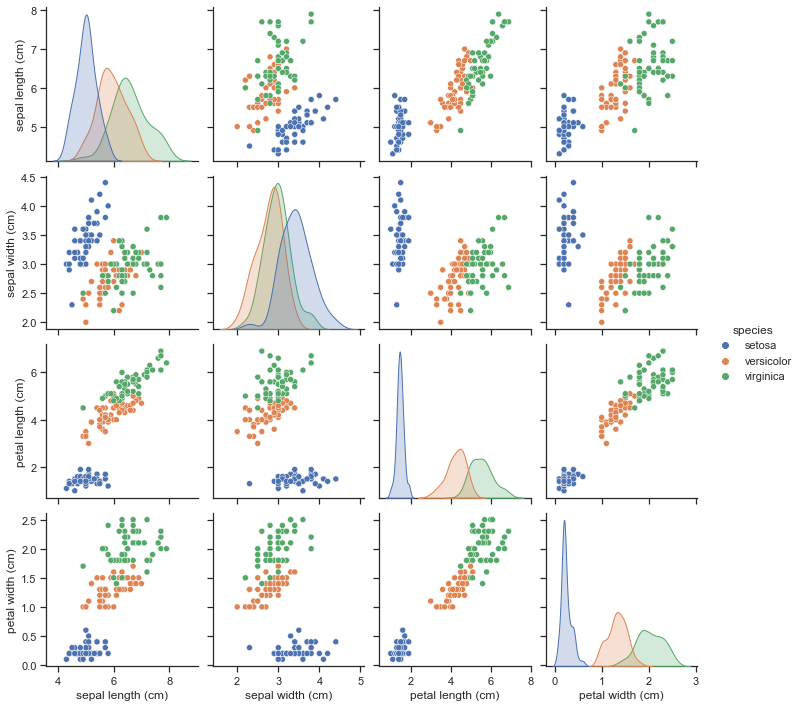

In [6]:
import numpy as np
import seaborn as sns; sns.set(style="ticks", color_codes=True) 
import sklearn.datasets
import pandas as pd
iris = sklearn.datasets.load_iris()
iris_df = pd.DataFrame(
data= np.c_[iris.data, [iris.target_names[v] for v in iris.target]],
columns= iris.feature_names + ['species']) 
cols = iris_df.columns.drop('species') 
iris_df[cols] = iris_df[cols].apply(pd.to_numeric) 
g = sns.pairplot(iris_df, hue='species')


For all 4 features, setosa can be separated from the other two classes easily no matter which two features are chosen and with equal ease because it clusters nicely away from the other two for all pairs of features.

versicolor and virginica overlap slightly for some graphs such as sepal width vs petal length, sepal width vs petal width, petal length vs petal width but the **best separation** for all three taken together comes from petal width (y axis) vs other three features so I think petal width. Among the three graphs, **petal width vs petal length** gives the best separation so I will use this plot for ML


Question: 4

I would use petal width and petal length because petal width gives out 3 distinct almost resolved peaks for three species.

Yes, three clusters are obvious in petal width vs petal length graph

Yes, a fourth cluster can accomodated given it lies in following ranges: petal length > 4 & petal width < 1 or petal length < 2 & petal width > 1. Basically, if the fourth or fifth cluster lies towards bottom right or top left of the graph.

Yes,I think there is a relation between classificaiton and clustering because petal width increases with increasing petal length linearly (direct linear co-relation). In other words, three clusters are formed on a straight line. Because of this, even in the absence of labelling, one can be able to separate the classes using unsupervised learning.


Question: 5

In [7]:
# classification by three different classifiers
# Then, comparing their performances
# SVM, Naive Bayes, Decision Trees

# preprocessing dataset
# Turn the data into a matrix
# Matrix of rows = samples/instances and columns = features

n_samples = len(iris.data)

data = iris.data.reshape(n_samples, -1)

In [8]:
# Starting with SVM

# create a classifier: supoort vector machine
clf_svm = svm.SVC(gamma=0.001) 

# learning the digits on the fiest half of the digits i.e 5-% dataset used for training
clf_svm.fit(data[:n_samples // 2], iris.target[:n_samples // 2])

# predict the vakue of the digit on the second half
expected_svm = iris.target[n_samples // 2:]
predicted_svm = clf_svm.predict(data[n_samples // 2:])

# measuring the performance by accuracy

# printing classification report
#print("Classification report for the classifier %s: \n%s\n"
        #%(clf_svm, metrics.classification_report(expected_svm, predicted_svm)))


In [9]:
# Naive Bayes Classifier; there are 5 of these

from sklearn.naive_bayes import GaussianNB

clf_bg = GaussianNB()

# learning the digits on the fiest half of the digits i.e 5-% dataset used for training
clf_bg.fit(data[:n_samples // 2], iris.target[:n_samples // 2])

# predict the vakue of the digit on the second half
expected_clf_bg = iris.target[n_samples // 2:]
predicted_clf_bg = clf_bg.predict(data[n_samples // 2:])

# measuring the performance by accuracy

# printing classification report
#print("Classification report for the classifier %s: \n%s\n"
        #%(clf_bg, metrics.classification_report(expected_clf_bg, predicted_clf_bg)))


In [10]:
# Decision Tree classifiers

from sklearn.tree import DecisionTreeClassifier

clf_dtc = DecisionTreeClassifier()

# learning the digits on the fiest half of the digits i.e 5-% dataset used for training
clf_dtc.fit(data[:n_samples // 2], iris.target[:n_samples // 2])

# predict the vakue of the digit on the second half
expected_clf_dtc = iris.target[n_samples // 2:]
predicted_clf_dtc = clf_dtc.predict(data[n_samples // 2:])

# measuring the performance by accuracy

# printing classification report
#print("Classification report for the classifier %s: \n%s\n"
        #%(clf_dtc, metrics.classification_report(expected_clf_dtc, predicted_clf_dtc)))

# printing confusion matrix
#print("Confusion matrix: \n%s" % metrics.confusion_matrix(expected_clf_dtc, predicted_clf_dtc))

In [11]:
# Multiple Models using 50% data split
from sklearn import metrics

classifiers = [clf_svm,clf_bg,clf_dtc]

training, training_labels = data[:n_samples//2], iris.target[:n_samples//2]
testing, testing_labels = data[n_samples//2:], iris.target[n_samples//2:]

for clf in classifiers:
    clf.fit(training, training_labels)

predicteds = [clf.predict(testing) for clf in classifiers]

for i, clf in enumerate(classifiers):
  acc = metrics.accuracy_score(testing_labels, predicteds[i])
  print(f'Model using {classifiers[i]} Accuracy={acc:.3f}')


Model using SVC(gamma=0.001) Accuracy=0.000
Model using GaussianNB() Accuracy=0.333
Model using DecisionTreeClassifier() Accuracy=0.333


In [12]:
# Multiple models with 50% data split using train_test_split method
from sklearn.model_selection import train_test_split
X = data[:n_samples]
y = iris.target[:n_samples]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.5, random_state = 0)

# Multiple Models
from sklearn import metrics

classifiers = [clf_svm,clf_bg,clf_dtc]

training, training_labels = X_train, y_train
testing, testing_labels = X_test, y_test

for clf in classifiers:
    clf.fit(training, training_labels)

predicteds = [clf.predict(testing) for clf in classifiers]

for i, clf in enumerate(classifiers):
  acc = metrics.accuracy_score(testing_labels, predicteds[i])
  print(f'Model using {classifiers[i]} Accuracy={acc:.3f}')


Model using SVC(gamma=0.001) Accuracy=0.587
Model using GaussianNB() Accuracy=0.947
Model using DecisionTreeClassifier() Accuracy=0.960


Clearly, when using the train test split method, accuracies are way better than "hard" manual split of 50%.

So, answer to first part of 5th question is:

Decision tree has the highest performance when using train-test-split but when using the hard 50% split, both decision tree and naive bayes (gaussian) perform at jsut 33% accuracy. This can be due to the nature of data that models are being trained on i.e models are just seeing one part of the data and that may not be representative of the entire dataset.

In [13]:
# checking if more testing helps

training = [0.1, 0.2, 0.3, 0.4, 0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9]

def model_accuracy(p):

  X = data[:n_samples]
  y = iris.target[:n_samples]
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = p, random_state = 0)

  classifiers = [clf_svm,clf_bg,clf_dtc]

  training, training_labels = X_train, y_train
  testing, testing_labels = X_test, y_test

  for clf in classifiers:
      clf.fit(training, training_labels)

  predicteds = [clf.predict(testing) for clf in classifiers]

  for i, clf in enumerate(classifiers):
    acc = metrics.accuracy_score(testing_labels, predicteds[i])
    yield acc
    


In [14]:
import numpy as np
result = []
for p in training:
  result.append(list(model_accuracy(p)))


# now we have a 2D array
# x-axis values will be all the % of training data
# y axis values will be each column of this 2D array


res_mod = np.array(result)




In [15]:
svm_pred = res_mod[:, 0]
bg_pred = res_mod[:, 1]
dtc_pred = res_mod[:, 2]

<function matplotlib.pyplot.show(close=None, block=None)>

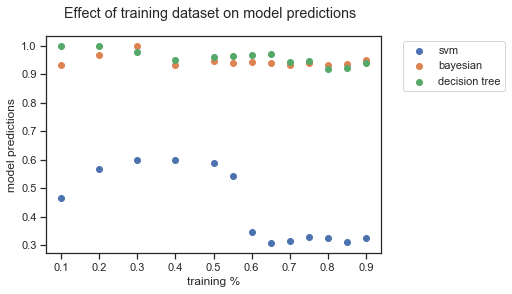

In [16]:
# plotting predicitons against training percent

import matplotlib.pyplot as plt

plt.scatter(training, svm_pred, label = "svm")
plt.scatter(training, bg_pred, label = "bayesian")
plt.scatter(training, dtc_pred, label = "decision tree")
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')



plt.xlabel('training %')
plt.ylabel('model predictions')

plt.suptitle(' Effect of training dataset on model predictions')
plt.show

Decision Tree classifier performs the best with 96.0% accuracy, Bayesian comes second with 94.7% accuracy while SVM performs the worst with 58.7% accuracy.

Performance of bayesian and decision tree classifiers is pretty much plateaued from the word go; it hovers between 0.9-1
Performace of svm plateaus out after 60% training set.

More training does not help the bayesian and decision tree and it stops helping svm post 60%